# PMOD TC1 Sensor demonstration

This demonstration shows how to use the PmodTC1. You will also see how to plot a graph using matplotlib.

The PmodTC1 is required.

The thermocouple sensor is initialized and set to log a reading every 1 second.  The temperature of the sensor
can be changed by touching it with warm fingers or by blowing on it.

### 1. Use TC1 to read the current temperature
Connect the TC1 sensor to PMODB.

In [1]:
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")

In [2]:
from pynq.lib import Pmod_TC1

# TC1 sensor is on PMODB
my_tc1 = Pmod_TC1(base.PMODB)
print('Raw Register Value: %08x hex' % my_tc1.read_raw())
print('Ref Junction Temp:  %.4f' % my_tc1.read_junction_temperature())
print('Thermocouple Temp:  %.2f' % my_tc1.read_thermocouple_temperature())
print('Alarm flags:        %08x hex' % my_tc1.read_alarm_flags())

Raw Register Value: 014416b0 hex
Ref Junction Temp:  22.6875
Thermocouple Temp:  20.25
Alarm flags:        00000000 hex


### 2. Starting logging temperature once every second
Users can use `set_log_interval_ms` to set the time elapsed during 2 samples. By default it is set to 1 second.

In [3]:
my_tc1.start_log()

### 3. Modifying the temperture

* Touch the thermocouple with warm fingers; or
* Blow on the thermocouple with cool air

Stop the logging whenever you are finished trying to change the sensor's value.

In [4]:
my_tc1.stop_log()
log = my_tc1.get_log()

### 4. Plot values over time

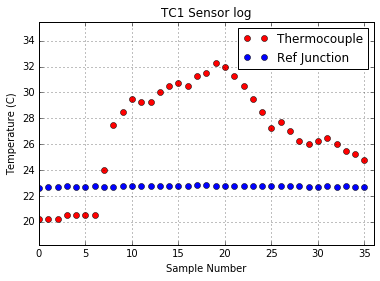

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from pynq.lib.pmod.pmod_tc1 import reg_to_tc
from pynq.lib.pmod.pmod_tc1 import reg_to_ref

tc = [reg_to_tc(v) for v in log]
ref = [reg_to_ref(v) for v in log]

plt.plot(range(len(tc)), tc, 'ro', label='Thermocouple')
plt.plot(range(len(ref)), ref, 'bo', label='Ref Junction')
plt.title('TC1 Sensor log')
plt.axis([0, len(log), min(tc+ref)*0.9, max(tc+ref)*1.1])
plt.legend()
plt.xlabel('Sample Number')
plt.ylabel('Temperature (C)')
plt.grid()
plt.show()

Copyright (c) 2022 Xilinx, Inc 
<br>
Copyright (C) 2022-2025 Advanced Micro Devices, Inc. 
<br>
SPDX-License-Identifier: BSD-3-Clause 